In [211]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 


In [212]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [213]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [214]:
#cross validation

from sklearn.model_selection import train_test_split # replaces deprecated code

#from sklearn.cross_validation import train_test_split
## This is deprecated. Why is it in the course material?

In [215]:
#data
rawData = pd.read_csv('creditFiltered.csv', header=0)
rawData.head()

,Unnamed: 0,id,limit,sex,edu,marriage,age,pay1,pay2,pay3,...,bill4,bill5,bill6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning and Preprocessing

In [216]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29072 entries, 0 to 29071
Data columns (total 26 columns):
Unnamed: 0    29072 non-null int64
id            29072 non-null int64
limit         29072 non-null int64
sex           29072 non-null int64
edu           29072 non-null int64
marriage      29072 non-null int64
age           29072 non-null int64
pay1          29072 non-null int64
pay2          29072 non-null int64
pay3          29072 non-null int64
pay4          29072 non-null int64
pay5          29072 non-null int64
pay6          29072 non-null int64
bill1         29072 non-null int64
bill2         29072 non-null int64
bill3         29072 non-null int64
bill4         29072 non-null int64
bill5         29072 non-null int64
bill6         29072 non-null int64
paid1         29072 non-null int64
paid2         29072 non-null int64
paid3         29072 non-null int64
paid4         29072 non-null int64
paid5         29072 non-null int64
paid6         29072 non-null int64
default       29

## Convert Categorical Variables that are Numeric Types into Category Types

In [217]:
# Convert categorical variables that are inputted as numeric into categorical types
rawData['sex'] = rawData.sex.astype('category')
rawData['edu'] = rawData.edu.astype('category')
rawData['marriage'] = rawData.marriage.astype('category')
rawData['pay1'] = rawData.pay1.astype('category')
rawData['pay2'] = rawData.pay2.astype('category')
rawData['pay3'] = rawData.pay3.astype('category')
rawData['pay4'] = rawData.pay4.astype('category')
rawData['pay5'] = rawData.pay5.astype('category')
rawData['pay6'] = rawData.pay6.astype('category')
rawData['default'] = rawData.default.astype('category')

## Create Train and Test set

70% and 30% split

Train Set
 - X_train: 
 - y_train: 
 
Test Set
 - X_test
 - y_test (also referred to as ground truth, used to test predictions on for performance)


In [218]:
X = rawData.iloc[:,2:24]
y = rawData['default']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [220]:
print('The number of observations in the Y training set are:',str(len(y_train.index)))


The number of observations in the Y training set are: 20350


In [221]:
print('The number of observations in the X training set are:',str(len(X_train.index)))


The number of observations in the X training set are: 20350


In [222]:
print('The number of observations in the X testing set are:',str(len(X_test.index)))


The number of observations in the X testing set are: 8722


In [223]:
print('The number of observations in the y testing set are:',str(len(y_test.index)))


The number of observations in the y testing set are: 8722


In [224]:
# verify split
len(X_test)/(len(X_test)+len(X_train))

0.30001375894331317

In [225]:
# verify split
len(y_test)/(len(y_test)+len(y_train))

0.30001375894331317

## Cross Validate Data

We don't need a section for this. This happens when we run our models. We specify the number of of folds and the type of folds there.

# Covariance Estimation

# Feature Engineering (either PCA or RFE) and Dimensionality Reduction


# One-Hot Encoding (if needed)


# Classification (4 Models) - First Attempt

Which algorithms should we try?

- Linear Classifiers: Logistic regression, Naive Bayes classifier, Fisher’s linear discriminant
- Support vector machines: Least squares support vector machines
- Quadratic classifiers
- Kernel estimation: k-nearest neighbor 
- Decision trees: Random forests
- Neural networks
- Learning vector quantization

## Random Forest

In [322]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)
predictions_rf= rf_model.predict(X_test)

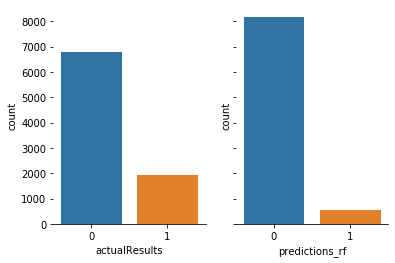

In [323]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_rf)
predictions_df.columns = ['predictions_rf']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_rf = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_rf, ax=axes[0] )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )

## Least Squares Support Vector Machine

In [324]:
# Least Squares Support Vector Machine
from sklearn.svm import LinearSVC
lssVM_model = LinearSVC(random_state=0, tol=1000)
lssVM_model.fit(X_train, y_train)
predictions_lssVM= lssVM_model.predict(X_test)

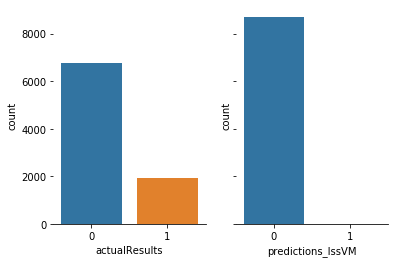

In [240]:
# Create pandas data frame of prediction and y_test results and plot it
predictions_df = pd.DataFrame(predictions_lssVM)
predictions_df.columns = ['predictions_lssVM']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_lssVM = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_lssVM, ax=axes[0] )
sns.countplot(x='predictions_lssVM', data = results_lssVM, ax=axes[1] )

## K- Nearest Neighbor

In [326]:
# K- Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)

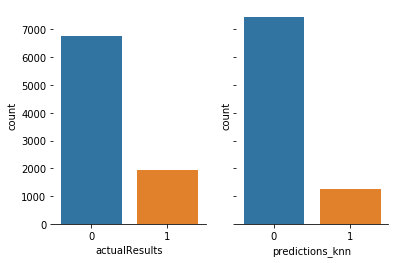

In [327]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_knn)
predictions_df.columns = ['predictions_knn']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_knn = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_knn, ax=axes[0] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[1] )

## Gaussian Naive Bayes

In [328]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
predictions_gnb=gnb_model.predict(X_test)

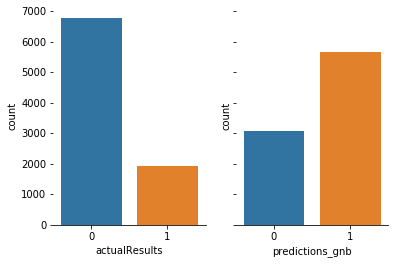

In [329]:
# Create pandas data frame of prediction and y_test results and plot it

predictions_df = pd.DataFrame(predictions_gnb)
predictions_df.columns = ['predictions_gnb']
predictions_df.reset_index(drop=True, inplace=True)
ytest_df = pd.DataFrame(y_test)
ytest_df.columns = ['actualResults']
ytest_df.reset_index(drop=True, inplace=True)
res = [ytest_df,predictions_df]
results_gnb = pd.concat(res,sort=False, axis = 1)

fig, axes = plt.subplots(1,2, sharex=True, sharey= True)
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_gnb, ax=axes[0] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[1] )

## Performace Metrics for Models

### Model Accuracy

We have a class imbalance. Most of our customers did not default (which is great) but that means that accuracy is not the best metric due to the accuracy paradox. 

In [276]:
# Accuracy
from sklearn.metrics import accuracy_score
print('The RandomForest model Accuracy score is:',str(accuracy_score(y_test, predictions_rf)))
print('The Least Squares Support Vector Machine model Accuracy score is:',str(accuracy_score(y_test, predictions_lssVM)))
print('The  K-Nearest Neighbor model Accuracy score is:',str(accuracy_score(y_test, predictions_knn)))
print('The Gaussian Naive Bayes model Accuracy score is:',str(accuracy_score(y_test, predictions_gnb)))

The RandomForest model Accuracy score is: 0.8057784911717496
The Least Squares Support Vector Machine model Accuracy score is: 0.7770006879156157
The  K-Nearest Neighbor model Accuracy score is: 0.7382481082320569
The Gaussian Naive Bayes model Accuracy score is: 0.48303141481311623


#### cross_val_score

In [330]:
print('The RandomForest model cross_val_score is:',str(cross_val_score(rf_model, X_train, y_train)))
print('The Least Squares Support Vector Machine model cross_val_score is:',str(cross_val_score(lssVM_model, X_train, y_train)))
print('The K-Nearest Neighbor model cross_val_score is:',str(cross_val_score(knn_model, X_train, y_train)))
print('The Gaussian Naive Bayes model cross_val_score is:',str(cross_val_score(gnb_model, X_train, y_train)))


The RandomForest model cross_val_score is: [0.804914   0.80859951 0.8034398  0.8007371  0.802457  ]
The Least Squares Support Vector Machine model cross_val_score is: [0.77346437 0.77223587 0.77420147 0.77371007 0.77346437]
The K-Nearest Neighbor model cross_val_score is: [0.74250614 0.73218673 0.72628993 0.72137592 0.73095823]
The Gaussian Naive Bayes model cross_val_score is: [0.46363636 0.45503686 0.47911548 0.42309582 0.51621622]


### Precision
What proportion of positive identifications (defaults) was actually correct?
When the model predicts a customer will default, how many times is it correct?
Ideally, we want a high precision. The higher the better. 

In [315]:
# Precision Score (Add percentage instead of decimal later)
from sklearn.metrics import precision_score
model="Random Forest"
score= precision_score(y_test, predictions_rf, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="Least Squares Support Vector Machine"
score= precision_score(y_test, predictions_lssVM, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="K-Nearest Neighbor"
score= precision_score(y_test, predictions_knn, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")
model="Gaussian Naive Bayes"
score= precision_score(y_test, predictions_gnb, average="binary")
print(f"When the {model} model predicts a customer will default, it is correct {score:.5f} of the time.")

When the Random Forest model predicts a customer will default, it is correct 0.72578 of the time.
When the Least Squares Support Vector Machine model predicts a customer will default, it is correct 0.35714 of the time.
When the K-Nearest Neighbor model predicts a customer will default, it is correct 0.36493 of the time.
When the Gaussian Naive Bayes model predicts a customer will default, it is correct 0.27314 of the time.


### Recall
What proportion of actual positives was identified correctly?
How many times did the model correctly identify all customers who defaulted?
If we have false negatives, it means a customer defaulted but we did not detect it. Recall measures how many times our model predicts that a customer defaulted versus how many times customers actually defaulted. A higher score means we have little false negatives. A lower score means that the model is not correctly identifying these false negatives which is very important because this is our underlying problem. We have had customers who defaulted but we haven't successfully predicted who these customers are.

In [319]:
#Recall Score (Add percentage instead of decimal later)
from sklearn.metrics import recall_score
model="Random Forest"
score= recall_score(y_test, predictions_rf, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="Least Squares Support Vector Machine"
score= recall_score(y_test, predictions_lssVM, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="K-Nearest Neighbor"
score= recall_score(y_test, predictions_knn, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")
model="Gaussian Naive Bayes"
score= recall_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model correctly identifed all customer who defaulted {score:.5f} of the time.")

The Random Forest model correctly identifed all customer who defaulted 0.20453 of the time.
The Least Squares Support Vector Machine model correctly identifed all customer who defaulted 0.00258 of the time.
The K-Nearest Neighbor model correctly identifed all customer who defaulted 0.23802 of the time.
The Gaussian Naive Bayest model correctly identifed all customer who defaulted 0.79650 of the time.


### F1 Score
F1 = 2 * (precision * recall) / (precision + recall)
Combines precision and recall. We want a model with the highest F1 score. 

In [321]:
from sklearn.metrics import f1_score
model="Random Forest"
score= f1_score(y_test, predictions_rf, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="Least Squares Support Vector Machine"
score= f1_score(y_test, predictions_lssVM, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="K-Nearest Neighbor"
score= f1_score(y_test, predictions_knn, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")
model="Gaussian Naive Bayes"
score= f1_score(y_test, predictions_gnb, average="binary")
print(f"The {model} model has an f1 score of {score:.5f} .")


The Random Forest model has an f1 score of 0.31913 .
The Least Squares Support Vector Machine model has an f1 score of 0.00512 .
The K-Nearest Neighbor model has an f1 score of 0.28812 .
The Gaussian Naive Bayes model has an f1 score of 0.40679 .


### Combined Bar Chart of Models: Actual vs Predictions

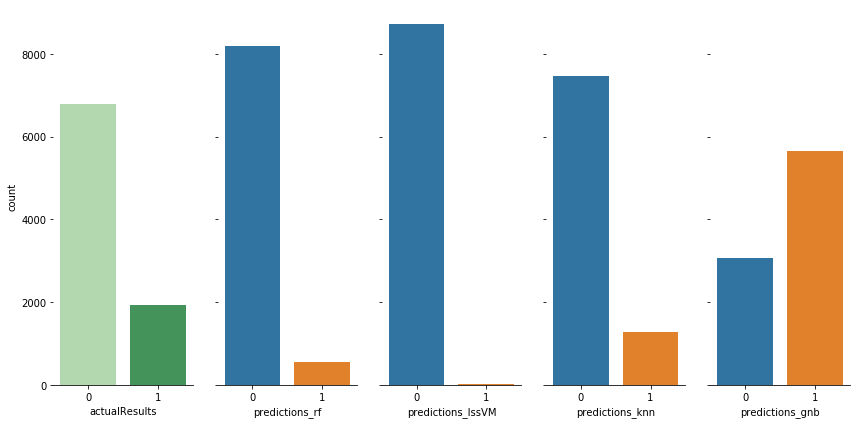

In [271]:
fig, axes = plt.subplots(1,5, sharex=True, sharey= True, figsize=(12,6))
sns.despine(left=True)

sns.countplot(x='actualResults', data = results_lr, ax=axes[0], palette="Greens" )
sns.countplot(x='predictions_rf', data = results_rf, ax=axes[1] )
sns.countplot(x='predictions_lssVM', data =results_lssVM, ax=axes[2] )
sns.countplot(x='predictions_knn', data = results_knn, ax=axes[3] )
sns.countplot(x='predictions_gnb', data = results_gnb, ax=axes[4] )

fig.tight_layout()

for ax in axes.flat:
    ax.label_outer()

# Classification (3 Models) - Second Attempt

Which algorithms should we try?

- Linear Classifiers: Naive Bayes classifier
- Kernel estimation: k-nearest neighbor 
- Decision trees: Random forests

# Model Evaluation